In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
%matplotlib inline
import matplotlib.pyplot as plt


In [25]:
ds = pd.read_csv('./ds_salaries.csv')
df = ds.drop(columns=["Unnamed: 0"])
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [26]:
ds.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


array([[<Axes: xlabel='work_year', ylabel='work_year'>,
        <Axes: xlabel='salary', ylabel='work_year'>,
        <Axes: xlabel='salary_in_usd', ylabel='work_year'>,
        <Axes: xlabel='remote_ratio', ylabel='work_year'>],
       [<Axes: xlabel='work_year', ylabel='salary'>,
        <Axes: xlabel='salary', ylabel='salary'>,
        <Axes: xlabel='salary_in_usd', ylabel='salary'>,
        <Axes: xlabel='remote_ratio', ylabel='salary'>],
       [<Axes: xlabel='work_year', ylabel='salary_in_usd'>,
        <Axes: xlabel='salary', ylabel='salary_in_usd'>,
        <Axes: xlabel='salary_in_usd', ylabel='salary_in_usd'>,
        <Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>],
       [<Axes: xlabel='work_year', ylabel='remote_ratio'>,
        <Axes: xlabel='salary', ylabel='remote_ratio'>,
        <Axes: xlabel='salary_in_usd', ylabel='remote_ratio'>,
        <Axes: xlabel='remote_ratio', ylabel='remote_ratio'>]],
      dtype=object)

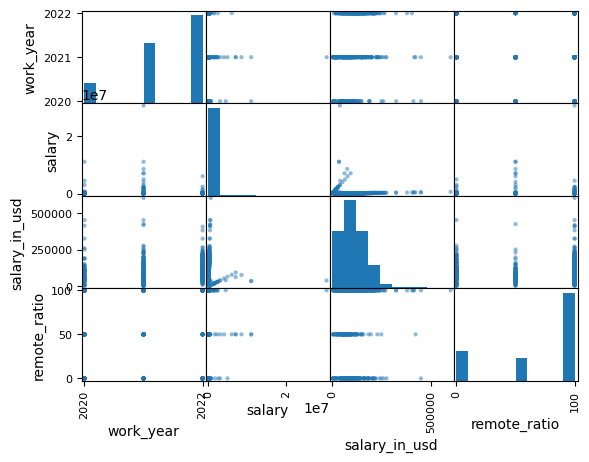

In [27]:
scatter_matrix(df)

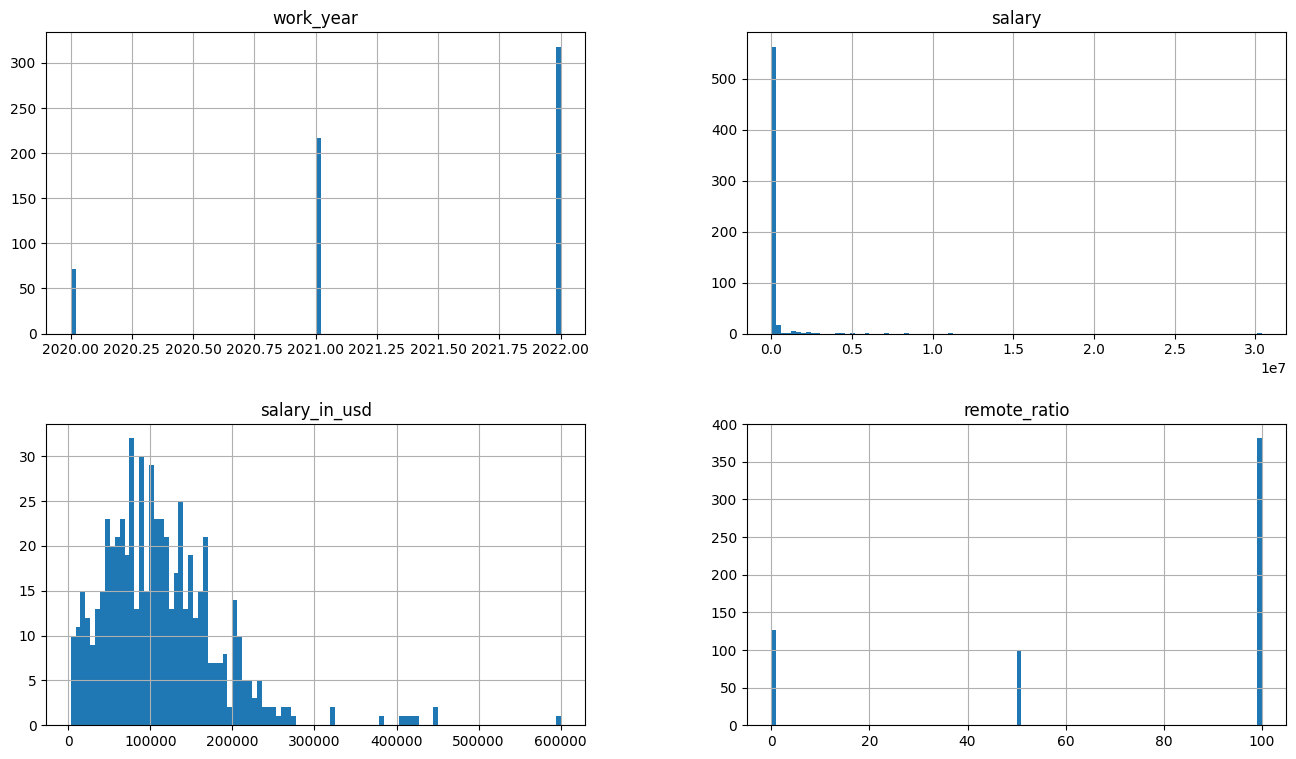

In [28]:
df.hist(bins=100,figsize=(16,9))
plt.show()

In [41]:
num_features = [ 'work_year', 'remote_ratio']
cat_features = ['experience_level', 'employment_type', 'job_title', 'salary_currency','employee_residence','company_location','company_size']
train_df, test_df = train_test_split(df, test_size=0.2)
df.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L


In [42]:

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
])

pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_features),
])

score_transform = StandardScaler()

X_train = pipeline.fit_transform(train_df)
Y_train = score_transform.fit_transform(train_df[['salary']])

X_test = pipeline.transform(test_df)
Y_test = score_transform.transform(test_df[['salary']])

In [43]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [46]:

Y_hat = model.predict(X_test)
Y_pred = score_transform.inverse_transform(Y_hat)
Y_target = score_transform.inverse_transform(Y_test)
error = mean_squared_error(Y_pred, Y_target)
error

88295682716.3578